In [10]:
import pandas as pd
import seaborn as sns


buffalo_lead = pd.read_csv('data/buffalo_lead_less27.csv')
buffalo_lead['lead_danger'] = [0 if x < 5 else 1 for x in buffalo_lead['lead_ppb']]
buffalo_lead.columns

Index(['Unnamed: 0', 'the_geom', 'cartodb_id', 'year', 'lead_ppb', 'address',
       'zipcode', 'latitude', 'longitude', 'Prop_Num_str', 'PropStreet',
       'numstreet', 'citystatezip', 'city', 'latitude_r', 'longitude_r',
       'state', 'street', 'yearBuilt', 'zipcode_r', 'lead_danger'],
      dtype='object')

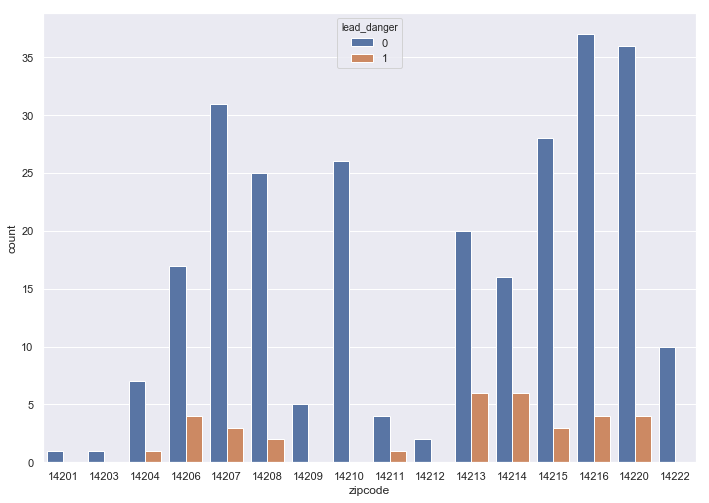

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x='zipcode', hue='lead_danger', data=buffalo_lead)

C:\Users\gushi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\gushi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


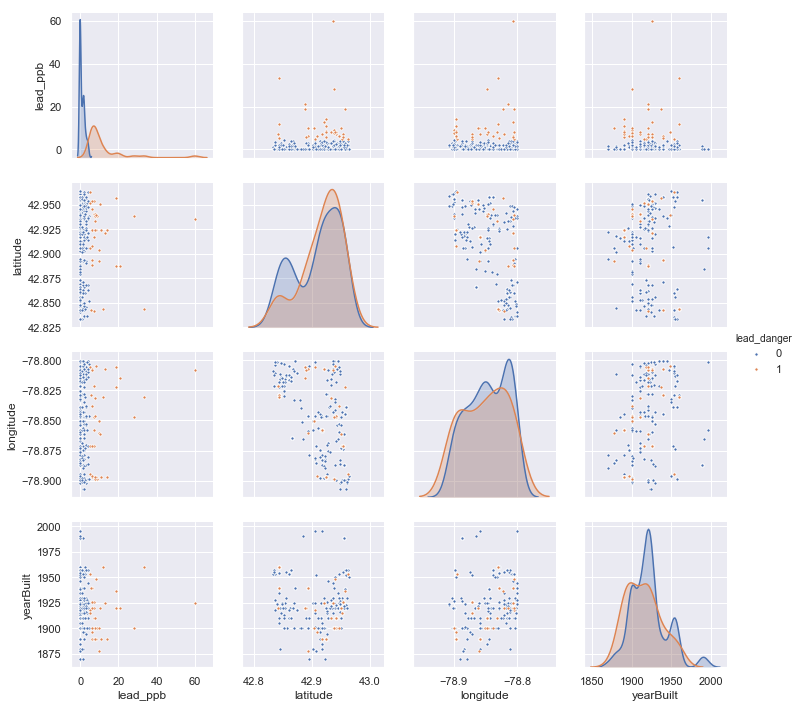

In [12]:
excluded = ('Unnamed: 0', 'the_geom', 'cartodb_id', 'year', 'address',
       'zipcode', 'Prop_Num_str', 'PropStreet',
       'numstreet', 'citystatezip', 'city', 'latitude_r', 'longitude_r',
       'state', 'street', 'zipcode_r', 'lead_danger')

data_columns = [label for label in list(buffalo_lead.columns) if label not in excluded]
sns.pairplot(buffalo_lead, hue = 'lead_danger', vars = data_columns, diag_kind = 'kde', plot_kws = {'s':10})

In [14]:
import sklearn
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    buffalo_lead, buffalo_lead, test_size=0.4, random_state=0)